<a href="https://colab.research.google.com/github/leandrofigueiraalmeida/Fraud_Detection_Transactions_Payments/blob/main/LFA_Fraudes_TransacoPagamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Challenge: Fraud Detection on  Transactions of Payments


### Developer:         Leandro Figueira de Almeida
### Date:           09/07/2023
### Linkedin:    https://www.linkedin.com/in/leandro-figueira-de-almeida/
### Phone:    19 - 98181 5364
### Email:         leandro.figueira.almeida@gmailcom

# 1° What's Business Problem

> You are a Data Scientist at **Hotmart** , has as its Mission to transform content creators into entrepreneurs.

> Among the various tool solutions for content creators, Hotmart offers its **Payment Gateway Service**.

> See that payment page where we put the **purchase transaction data**?

> Its aim is to Create a Predictive Machine to Detect Transactions that are possibly FRAUDULENT**.



# 2° Exploratory Data Analysis

* Imports

In [ ]:
# Bibliotecas utilizadas na Construção da Aplicação
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

* Loading Data

In [ ]:
#Importação dos Dados
df =  pd.read_csv('/content/TransPag.csv')

* Checking Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


* Reading Data

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


* Data Dimensions

In [ ]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

* Data Types

In [ ]:
df.dtypes

* Check NA

In [ ]:
# Verificando valores missing  e linhas duplicadas
df.isna().sum()

* Descriptive Statistical

In [ ]:
# Estatísticas descritivas das variáveis
df.describe()

* Exploring the correlations of the variables with the target variablet

In [ ]:
# Checking correlation - Checando as Correlações do Target
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


* Exploring the correlations all variables

In [ ]:
df.corr(method='spearman')

* Exploring Transaction Type "type"

In [ ]:
# Explorando o Tipo de Transação "type"
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
# Explorando o Tipo de Transação "type"
type = df["type"].value_counts()

# Dashboard

In [ ]:
# Explorando o Tipo de Transação "type" e Criando Gráfico de Rosca
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

* Install DATAPREP

In [ ]:
#Instalação do Pacote
!pip install dataprep

* DATAPREP Report

DataPrep Report
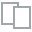
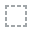
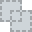
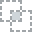
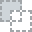
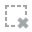
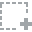
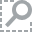
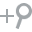
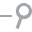
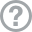
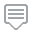
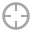
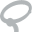
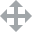
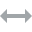
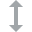
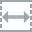
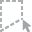
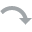
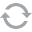
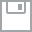
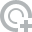
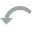
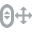
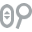
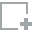
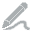
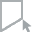
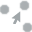
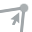
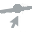

In [ ]:
# Relatório Automatizado
from dataprep.eda import create_report
create_report(df)

# 3° Data Preparation

* Change types

In [ ]:
# Fazendo conversão de object para número
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})


In [ ]:
# Alterando a Label para a saída ficar visível
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


Loading new Data

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


* Data Describe

In [ ]:
# Estatística dos Campos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
type,6362620.0,2.055307e+00,9.808966e-01,1.0,1.00,2.000,3.000000e+00,5.000000e+00
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


* Target Variable

In [ ]:
# Avaliando o Target
data.isFraud.value_counts()

No Fraud    6354407
Fraud          8213
Name: isFraud, dtype: int64

In [ ]:
# Separando as Variáveis Explicativas (x) da variável Target (y)
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

# 4° Predictive Machine to Fraud Detection

* Data Training and Predictive Machine

In [ ]:
# Treinando a Máquina Preditiva com Machine Learning
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
#print(model.score(xtest, ytest))

DecisionTreeClassifier()

In [ ]:
# Fazendo novas Predições com dados de Teste
y_pred = model.predict(xtest)

In [ ]:
y_pred

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

# 5° Evaluating Predictive Machine

* Evaluate Model

In [ ]:
# Evaluate model - Avaliando a Máquina Preditiva (Modelo)
print('Métricas do Classification Report: \n', classification_report(ytest, y_pred))
print('Acurácia: \n', accuracy_score(ytest, y_pred))
print('Confusion Matrix: \n', confusion_matrix(ytest, y_pred))

Métricas do Classification Report: 
               precision    recall  f1-score   support

       Fraud       0.91      0.89      0.90       817
    No Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.95      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262

Acurácia: 
 0.9997375295082843
Confusion Matrix: 
 [[   726     91]
 [    76 635369]]


In [ ]:
print('Acurácia: \n', accuracy_score(ytest, y_pred))

Acurácia: 
 0.9997375295082843


### New Predictions

#### Case 1

In [ ]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


##### Results



#####

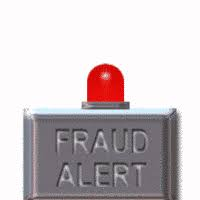

#### Case 2

In [ ]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[2, 5000, 5000, 0.0]])
print(model.predict(features))

['No Fraud']


##### Results



#####

![](https://cliply.co/wp-content/uploads/2021/03/372103860_CHECK_MARK_400px.gif)

In [ ]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[1, 5000, 5000, 0.0]])
print(model.predict(features))